In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature

In [2]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

def PR_curve(y_test, y_score):
    average_precision = average_precision_score(y_test, y_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))


    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

In [3]:
image_src = 'Homework1/*.jpg'
image_list = []  
for file in sorted(glob.glob(image_src)):
    image_list.append(file)
    
print('Read {} images'.format(len(image_list)))

Read 2000 images


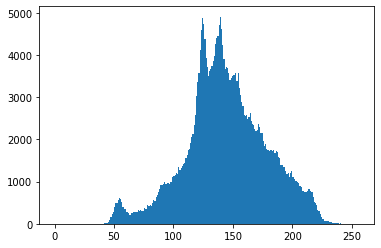

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    1    4    3    3
    8   14   26   47   98  162  234  285  402  487  504  576  604  583
  517  403  347  358  280  281  255  219  255  253  276  273  278  291
  323  310  326  309  315  375  347  354  436  422  453  428  492  556
  543  633  693  754  821  932  912  935  985  956  937  976  936  993
  997 1104 1142 1164 1199 1175 1336 1274 1334 1362 1423 1450 1561 1637
 1752 1778 1921 2065 2138 2342 2593 3040 3358 3581 4126 4592 4874 4745
 4379 3932 3720 3509 3617 3682 3749 3860 3987 4255 4412 4457 4709 4913
 4619 4236 3907 3684 3710 3695 3582 3407 3460 3511 3526 3522 3568 3398
 3569 3226 3054 2880 2785 2574 2555 2593 2498 2536 2631 2429 2369 2353
 2238 2197 2234 2369 2306 2149 2149 1975 1849 1900 1772 1747 1739 1745
 1740 1719 1740 1669 1734 1692 1587 1561 1399 1402 1355 1352 1261 1170
 1211 

In [4]:
# example of histogram
img = cv2.imread(image_list[0],0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

hist,bins = np.histogram(img.ravel(),256,[0,256])
print(hist)

print(preprocessing.normalize(hist.reshape(1, -1), norm='l2'))

print(np.sum(preprocessing.normalize(hist.reshape(1, -1), norm='l2') ** 2))

In [5]:
# create and store color histograms of images
image_source = []
for file in image_list:
    img = cv2.imread(file,0)
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    # normalize
    image_source.append(preprocessing.normalize(hist.reshape(1, -1), norm='l2'))

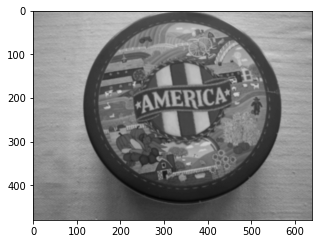

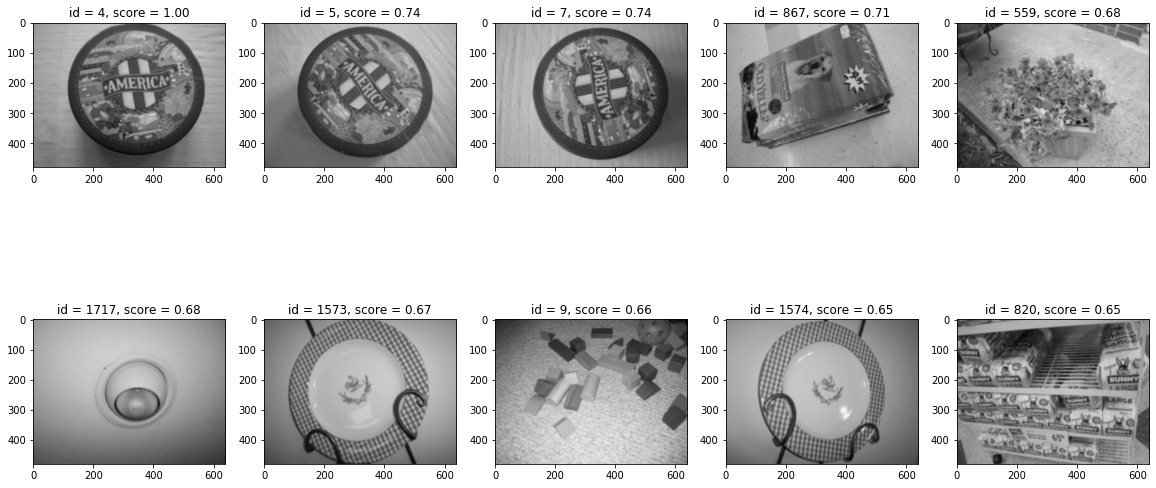

true values [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
scores:  [1.   0.74 0.74 0.71 0.68 0.68 0.67 0.66 0.65 0.65]
Average precision-recall score: 1.00


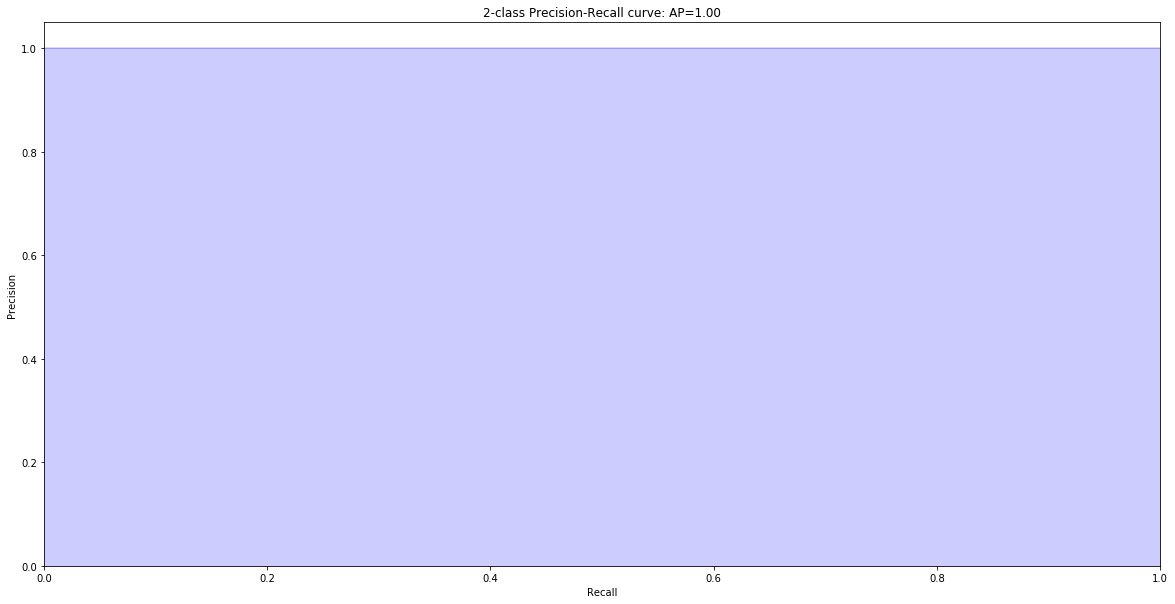

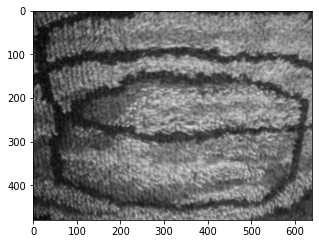

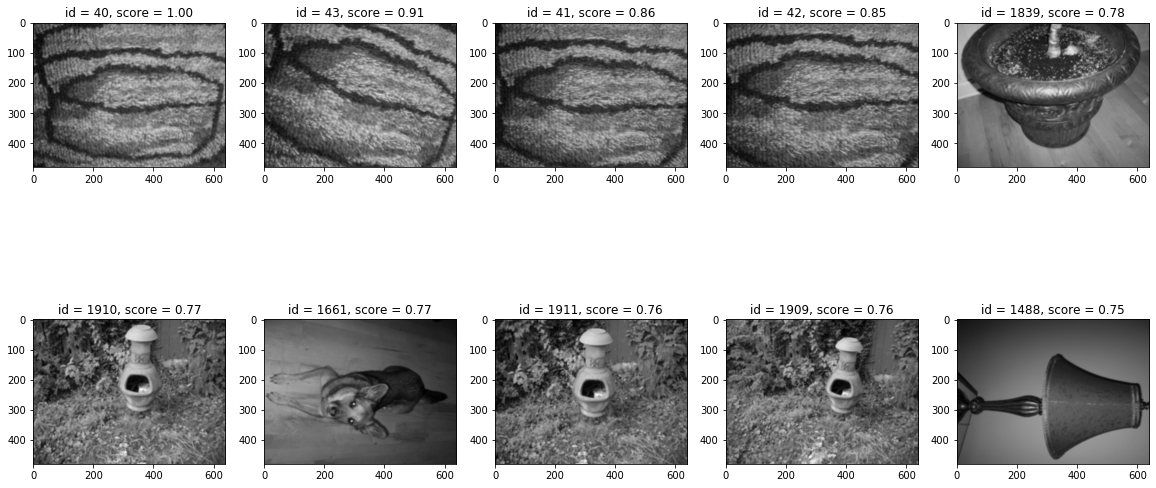

true values [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
scores:  [1.   0.91 0.86 0.85 0.78 0.77 0.77 0.76 0.76 0.75]
Average precision-recall score: 1.00


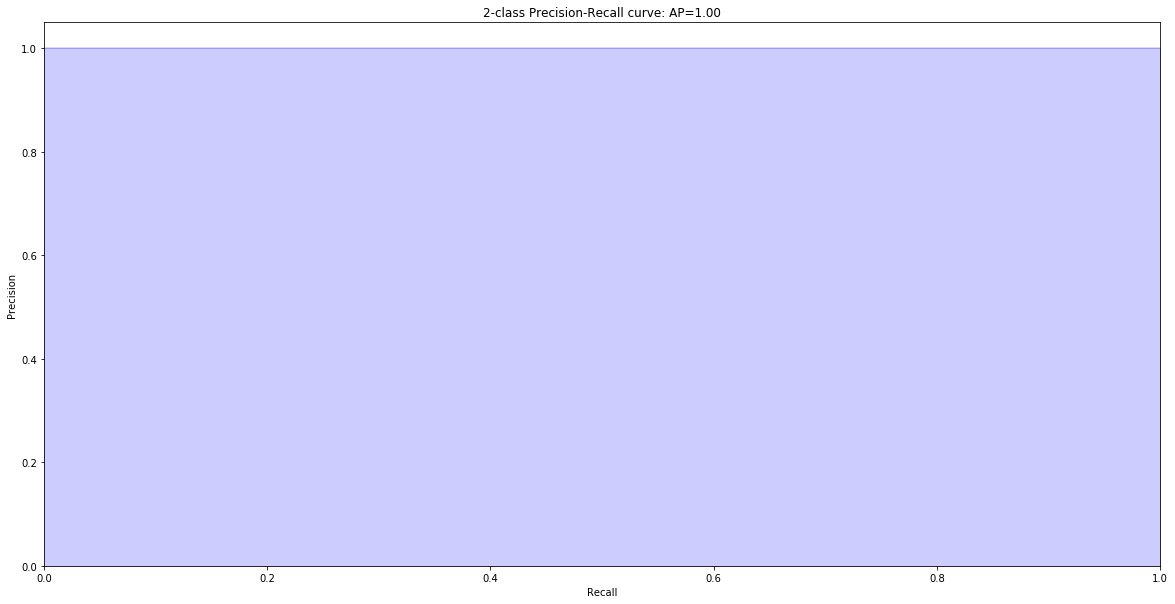

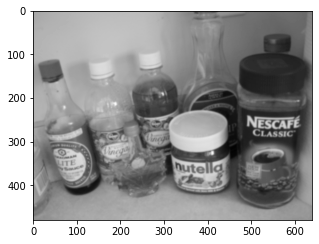

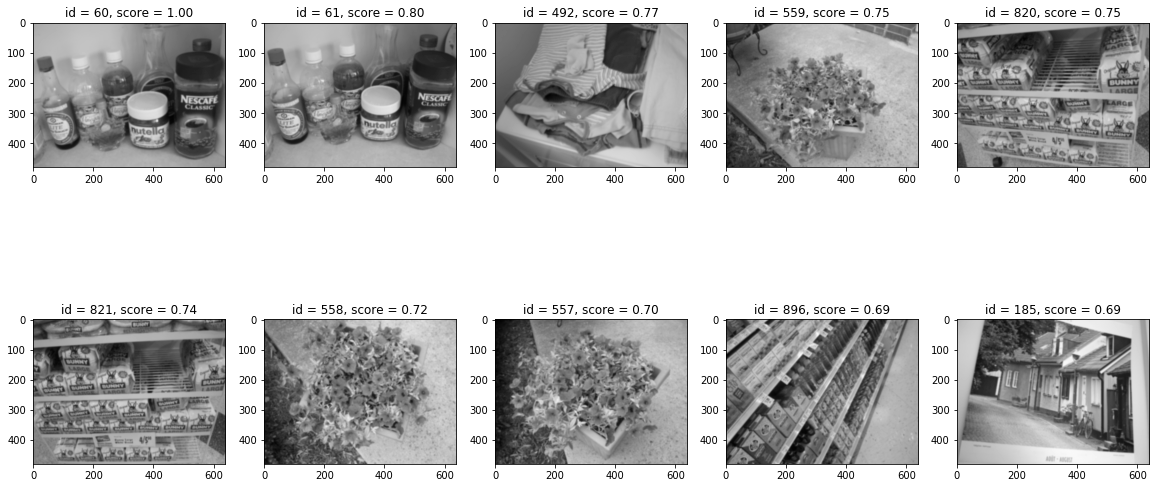

true values [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
scores:  [1.   0.8  0.77 0.75 0.75 0.74 0.72 0.7  0.69 0.69]
Average precision-recall score: 1.00


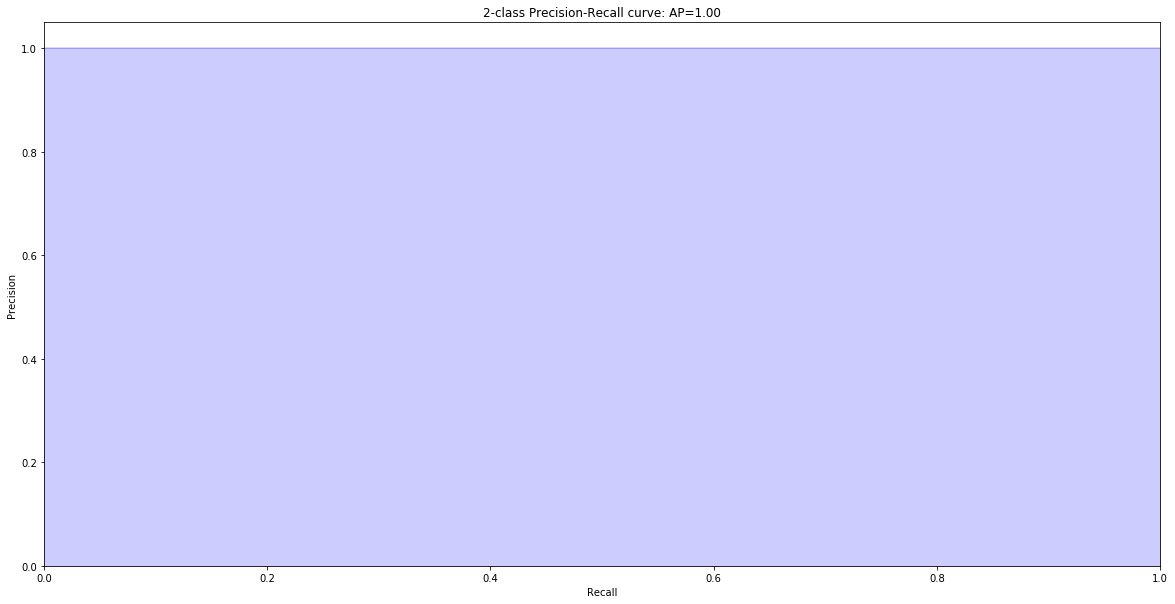

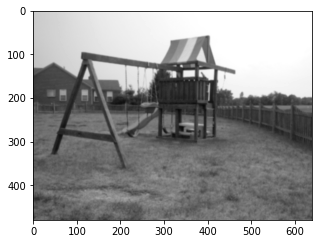

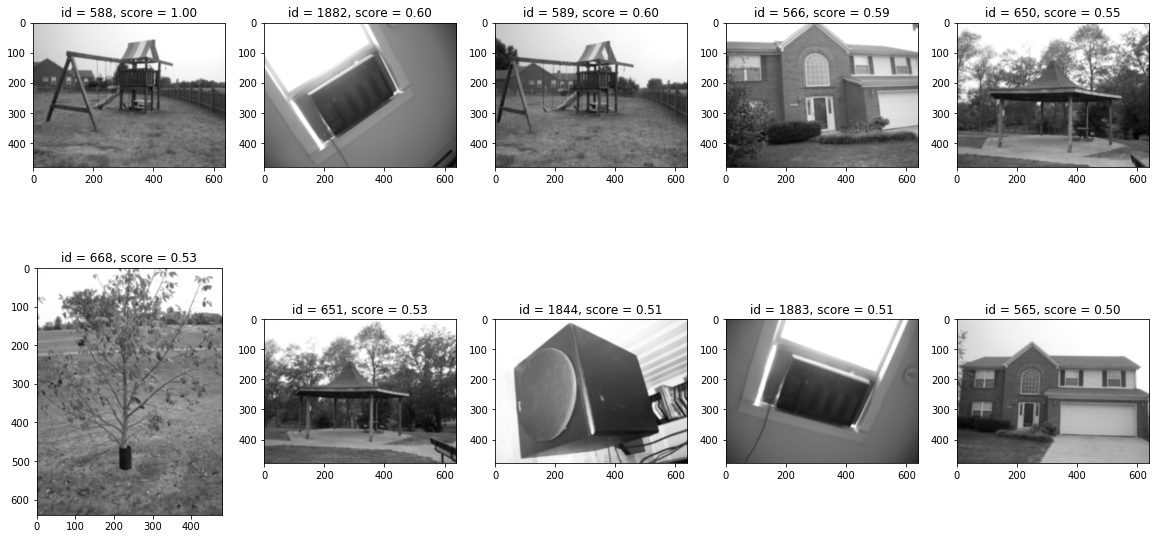

true values [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
scores:  [1.   0.6  0.6  0.59 0.55 0.53 0.53 0.51 0.51 0.5 ]
Average precision-recall score: 0.83


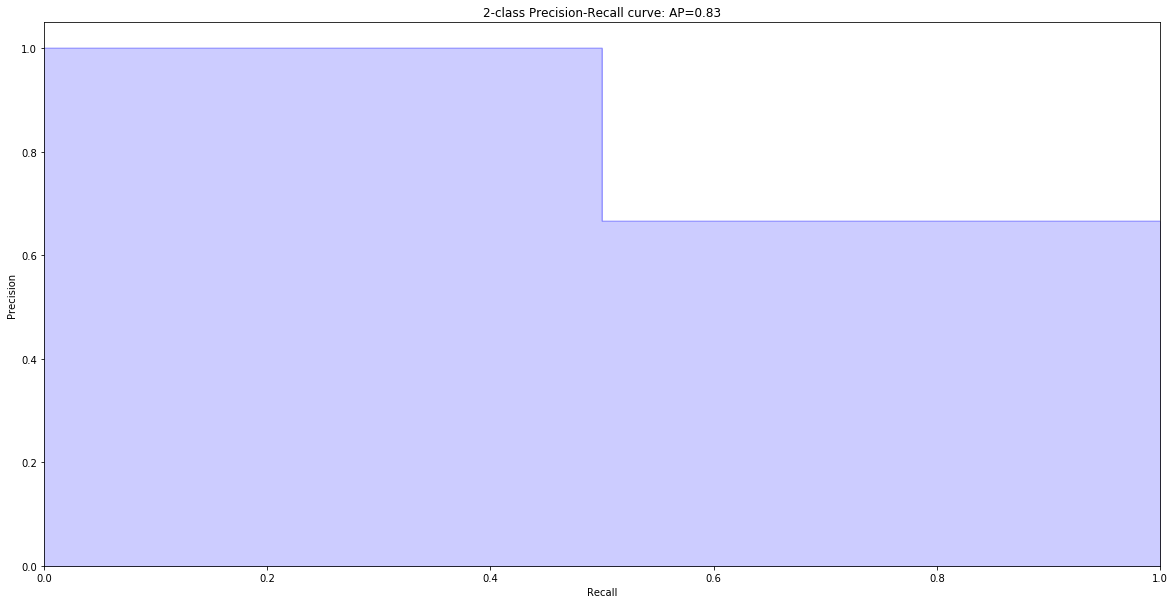

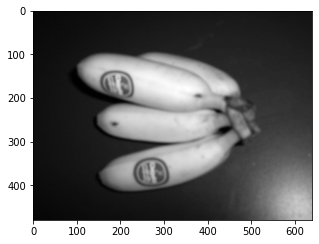

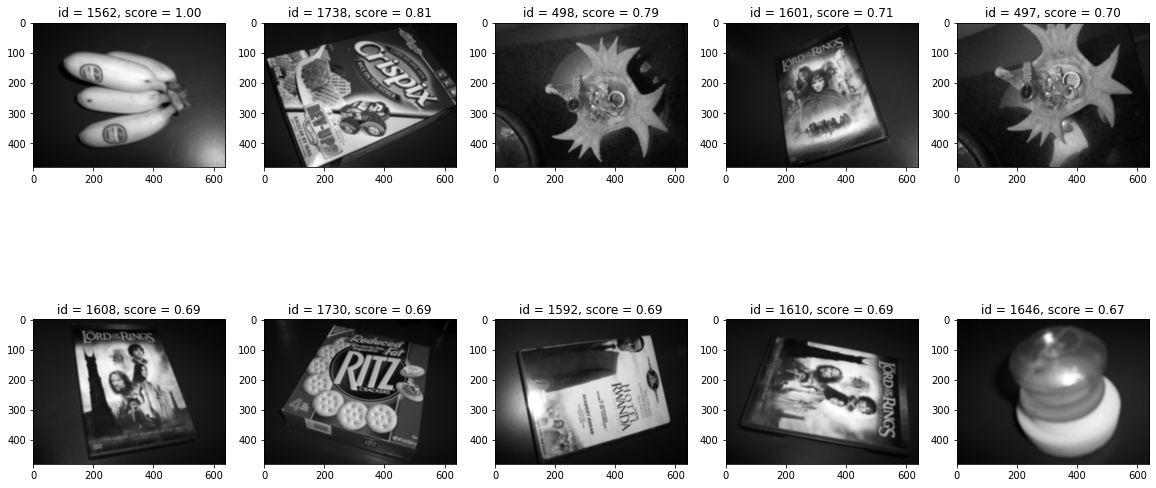

true values [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
scores:  [1.   0.81 0.79 0.71 0.7  0.69 0.69 0.69 0.69 0.67]
Average precision-recall score: 1.00


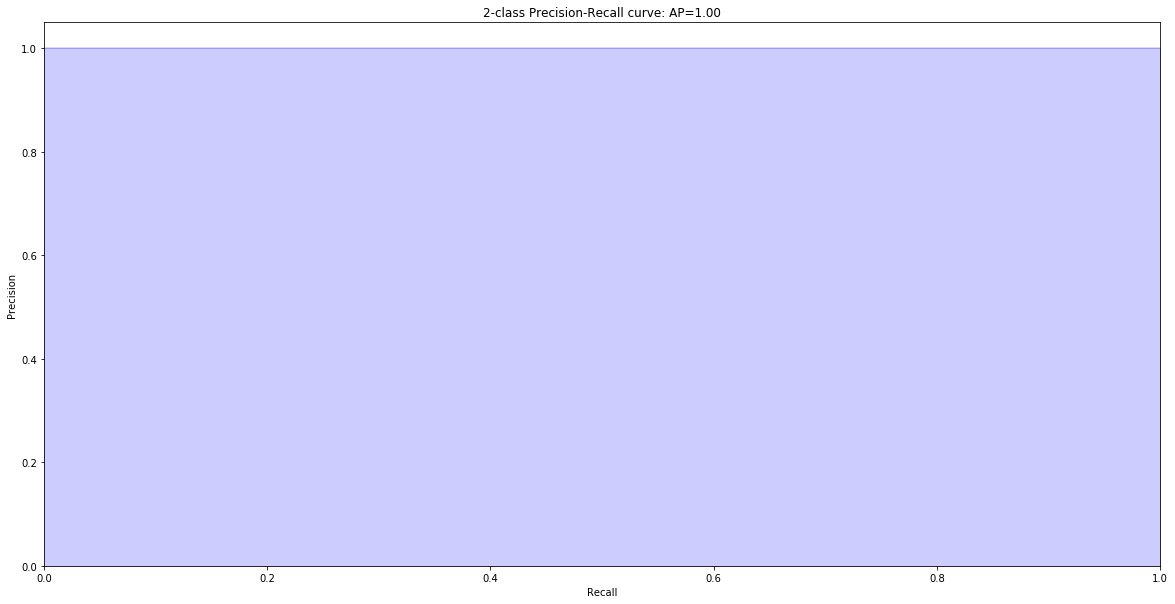

In [10]:
query_images = [
    4, 40, 60, 588, 1562
]

for query_id in query_images:
    # ----------------------------------------------------
    # search for top 10 matches by Euclidean distance

    query_img = image_source[query_id]
    query_result = []
    for img_hist in image_source:
        # Euclidean distance
        query_result.append(np.linalg.norm(np.subtract(query_img, img_hist)))

    query_result = np.array(query_result)
    query_result = np.around(query_result, 2)
    # from smallest to highest
    top_matches = query_result.argsort()[:10]
    # remove myself
    #top_matches = np.delete(top_matches, 0)
    scores = 1 - query_result[top_matches]
    


    # ----------------------------------------------------
    # plot search results, top 10 matches

    plt.rcParams['figure.figsize'] = [5, 5]
    plt.imshow(cv2.imread( image_list[query_id], 0), cmap = 'gray', interpolation = 'bicubic')
    plt.show()

    plt.rcParams['figure.figsize'] = [20, 10]
    f, axarr = plt.subplots(2,5)
    k = 0
    for i in range(2):
        for j in range(5):
            img_src = image_list[top_matches[k]]
            axarr[i, j].imshow(cv2.imread(img_src,0), cmap = 'gray', interpolation = 'bicubic')
            axarr[i, j].set_title('id = {}, score = {:.2f}'.format(top_matches[k], scores[k]))
            k += 1

    plt.show()     


    # ----------------------------------------------------
    # plot precision recall

    y_test = []
    for i in top_matches:
        if i >= query_id and i < query_id +4:
            # true prediction
            y_test.append(1)
        else:
            # false prediction
            y_test.append(0)

    print('true values', y_test)
    print('scores: ', scores)

    PR_curve(np.array(y_test), scores)

    # ----------------------------------------------------